In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl

mpl.rc("savefig", dpi=200)
data = pd.read_csv('../data/yeast.csv', header=None).values

columns=['analoral_ct_bin',
 'cuddling_ct_bin',
 'cunninlingus_ct_bin',
 'ejaculationonbody_ct_bin',
 'fellatio_ct_bin',
 'intercourseanal_ct_bin',
 'intercoursevaginal_ct_bin',
 'kissing_ct_bin',
 'manualanalstimulation_ct_bin',
 'manualpenilestimulation_ct_bin',
 'manualvaginalstimulation_ct_bin',
 'massage_ct_bin',
 'sm_ct_bin',
 'testiclestimulation_ct_bin',
 'threesome_ct_bin']

columns2=["cunninlingus_ct_bin","fellatio_ct_bin",
          "intercoursevaginal_ct_bin","kissing_ct_bin",
          "manualpenilestimulation_ct_bin","massage_ct_bin"]

data2 = pd.read_csv('../data/reviewer-data.csv')[columns2].values

In [2]:
test=pd.read_csv('../data/reviewer-data.csv')

def is_numeric(obj):
    try:
        obj+obj, obj-obj, obj*obj, obj**obj, obj/obj
    except ZeroDivisionError:
        return True
    except Exception:
        return False
    else:
        return True

good_columns=[]
n = len(test)
for column in test.columns:
    temp=test[column]
    nulls = np.sum(temp.isnull())
    if nulls > 0.01*n: continue
    if not is_numeric(temp): continue
    if column in ['reviewerid']: continue
    good_columns += [column]
    
test = test[good_columns]
test.dropna(how='any', inplace=True)
data2 = test.values
print(data2.shape)
print(test.columns)
test.head()

(116721, 75)
Index(['reviewno_reviewers', 'analoral_ct', 'cuddling_ct', 'cunninlingus_ct',
       'ejaculationonbody_ct', 'fellatio_ct', 'intercourseanal_ct',
       'intercoursevaginal_ct', 'kissing_ct', 'manualanalstimulation_ct',
       'manualpenilestimulation_ct', 'manualvaginalstimulation_ct',
       'massage_ct', 'sm_ct', 'testiclestimulation_ct', 'threesome_ct',
       'analoral_ct_bin', 'cuddling_ct_bin', 'cunninlingus_ct_bin',
       'ejaculationonbody_ct_bin', 'fellatio_ct_bin', 'intercourseanal_ct_bin',
       'intercoursevaginal_ct_bin', 'kissing_ct_bin',
       'manualanalstimulation_ct_bin', 'manualpenilestimulation_ct_bin',
       'manualvaginalstimulation_ct_bin', 'massage_ct_bin', 'sm_ct_bin',
       'testiclestimulation_ct_bin', 'threesome_ct_bin', 'app_reviewer_p50',
       'app_reviewer_avg', 'perf_reviewer_p50', 'perf_reviewer_avg',
       'cscore_reviewer_p50', 'cscore_reviewer_avg', 'rvwyear_last_reviewer',
       'rvwyear_first_reviewer', 'rptescorts_reviewers'

,reviewno_reviewers,analoral_ct,cuddling_ct,cunninlingus_ct,ejaculationonbody_ct,fellatio_ct,intercourseanal_ct,intercoursevaginal_ct,kissing_ct,manualanalstimulation_ct,...,avgpph_avg,unqescorts_reviewers,ethnicity_n,build_n,breastappearance_n,haircolor_n,hairtype_n,service_n,reviewno_escort_max,reviewno_escort_min
0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,6.0,0.0,0.0,...,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,22.0
1,1.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,3.0,0.0,...,300.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,22.0
2,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,...,300.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,19.0,19.0
3,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,...,300.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,79.0,79.0
4,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,...,350.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


pc start
pc done
data size (1484, 8)


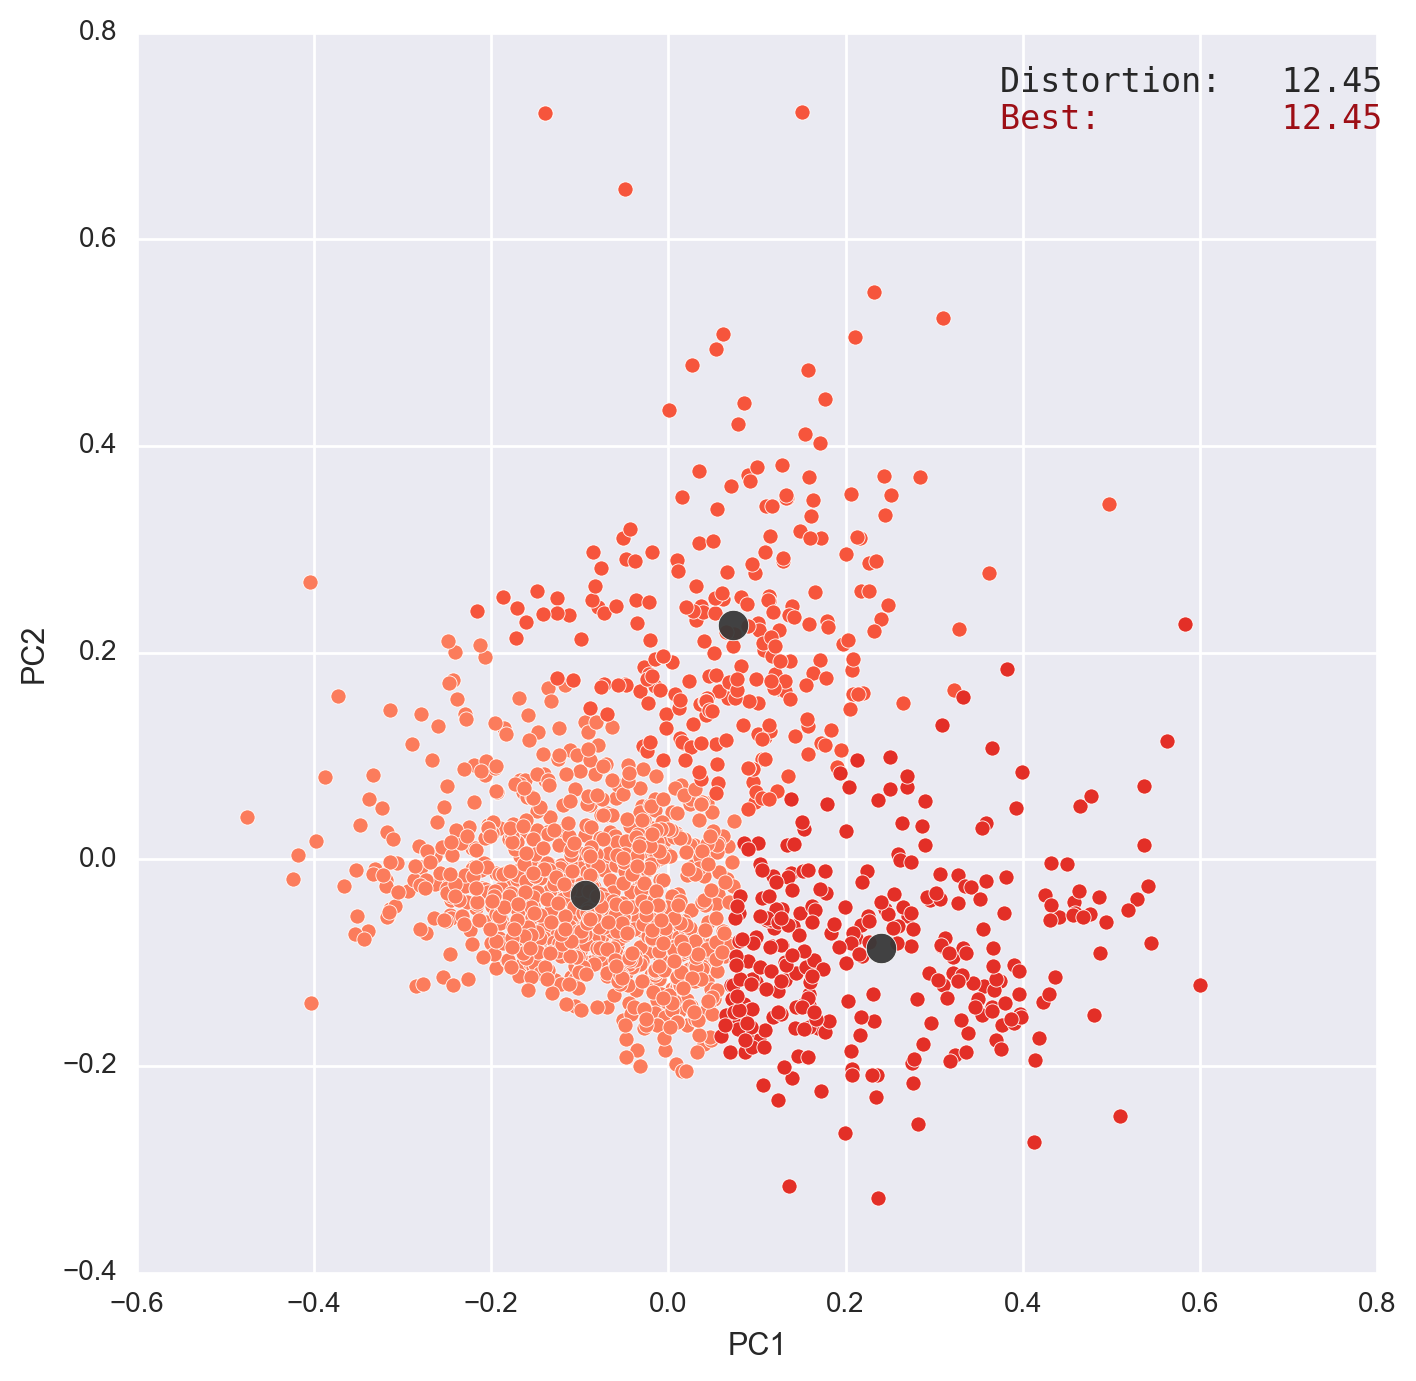

In [5]:
from kmeans.utilities import distortion, kmeans_plot
from kmeans.kmeans_stock import kmeans_stock

centers,labels,timing=kmeans_stock(data=data, n_clusters=3)

kmeans_plot(labels,
            centers,
            data,
            print_distortion=12.445, print_best=12.445)

In [ ]:
#basic c-style k-means algorithm

K=3
N,D=data.shape

A = np.zeros((K,D))
W = np.zeros(N,dtype=np.int)
X = data
m = np.zeros(K)

#randomization where we make sure there are points in every cluster
    
def shuffle(x,n):
    for i in range(n-2,-1,-1): #from n-2 to 0
        j= np.random.randint(0,i+1) #from 0<=j<=i
        temp = x[j]
        x[j] = x[i]
        x[i] = temp

best = np.inf
r=0        
for R in range(10):
    for n in range(N):
        W[n] = n%K
        
    shuffle(W,len(W))

    converged = False


    while not converged:
        converged = True
    
        #compute means
        for k in range(K):
            for d in range(D):
                A[k,d] = 0
            m[k]=0
            
        for n in range(N):
            for d in range(D):
                A[W[n],d]+=X[n,d]
            m[ W[n] ] +=1
    
        for k in range(K):
            for d in range(D):
                A[k,d] = A[k,d]/m[k]
                
                
        temp = distortion(W,A,X)
        if temp < best: best = temp
                    
        fig = kmeans_plot(W,A,X,print_distortion=temp,print_best=best);
    
        for b in range(3):
            r=r+1
            fig.savefig('image%d.jpg'%r,dpi=200)
            plt.close(fig)
            
        #assign to closest mean
        for n in range(N):
        
            min_val = np.inf
            min_ind = -1
        
            for k in range(K):
                temp =0
                for d in range(D):
                    temp += (X[n,d]-A[k,d])**2
            
                if temp < min_val:
                    min_val = temp
                    min_ind = k
                
            if min_ind != W[n]:
                W[n] = min_ind
                converged=False
                
        temp = distortion(W,A,X)
        if temp < best: best = temp
        fig = kmeans_plot(W,A,X,print_distortion=temp,print_best=best);
        
        for b in range(3):
            r=r+1
            fig.savefig('image%d.jpg'%r,dpi=200)
            plt.close(fig)

In [ ]:
def kmeans_stock(data, n_clusters,max_iter=100):
    start = time.time()
    stock = KMeans(n_clusters=n_clusters,n_init=1,max_iter=max_iter,algorithm='full')
    stock.fit(data)
    timing = time.time()-start
    return stock.cluster_centers_,stock.labels_,timing

A,W,T =kmeans_stock(data=data2,n_clusters=3)

distortion(W,A,data2)